## Task_5. Тестирование гипотез

In [3]:
import numpy as np
# import scipy.stats as stats
from scipy import stats
import pylab

### 1. Когда используется критерий Стьюдента, а когда Z –критерий?

<u>**_z - критерий_**</u><p>
Закон Z-критерия используется для проверки гипотезы о равенстве среднего значения генеральной совокупности с известным значением.
* $\sigma$ генеральной совокупность известна
* размер выборки велик

<u>**_критерий Стьюдента_**</u> <p>
Критерий Стьюдента используется для сравнения средних значений двух групп. Также его можно использовать для сравнения средних значений двух выборок, если данные для двух групп распределены нормально
* $\sigma$ генеральной совокупность не известна
* оценка статистической значимости разности 2-х выборочных средних
* если колличество элементов выборки $\leq$ 30, распределение средних не будет являться нормальным

**_Задачи 2,3 решать вручную_**

### 2. Проведите тест гипотезы.<p> Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. Используя односторонний критерий с α=0,05, проверить эту гипотезу, если в выборке из n=100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 кв. мм.

$H_0:\mu_1=\mu_0$<p>
$H_1:\mu_1>\mu_0$<p>

$$z_n=\frac{\bar{x}-\mu}{\sigma/\sqrt{n}}$$
$\frac{\sigma}{\sqrt{n}}$ - стандартная ошибка среднего

In [25]:
mu = 17
l = 0.05 # статистическая значимость
n = 100
x = 17.5
D = 4 # стандартное отклонение = корень из дисперсии

se = (D / n) ** 0.5
z = (x-mu) / se
print(f'z({z})')

z(2.5)


z(2.5) = 0.99379<p>
так как p-value > $\alpha$ => 0.99379 > 0.05, то принемаем нулевую гипотезу.

Вывод: Альтернативную гипотезу отвергаем. Шарики для подшипников, изготовленные автоматическим станком, не имеют средний диаметр 17 мм при полученных данных

In [27]:
stats.norm.cdf(2.5)

0.9937903346742238

### 3. Проведите тест гипотезы.<p>Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет: 202, 203, 199, 197, 195, 201, 200, 204, 194, 190. Известно, что их веса распределены нормально. Верно ли утверждение продавца, если учитывать, что доверительная вероятность равна 99%? (Провести двусторонний тест.)

$H_0:\mu_1 = \mu_0$<p>
$H_1:\mu_1 \neq \mu_0$<p>

$$t_н=\frac{\bar{x}-\mu}{\sigma_н/\sqrt{n}}$$
$\sigma_н$ - стандартное несмещенное отклонение, рассчитанное по выборке<p>
$s^2 = \frac{\sum_{i=1}^n(x_i-\bar{x})^2}{n-1}$

${\sigma_н/\sqrt{n}} = s/\sqrt{n} = \sqrt{s^2/n}$

In [20]:
mu = 200
n = 10
x = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])

def D_s_pow(arr, mean):
    D = 0
    for i in arr:
        D += (i - mean) ** 2
    return D / (len(arr) - 1)

x_mean = np.mean(x)
x_std = D_s_pow(x, x_mean)
t = (x_mean - mu) / (x_std / len(x)) ** 0.5
t

-1.0651074037450896

n - 1 = 9 - число степеней свобод<p>
0.99 доверительная вероятность<p>
Уровень значимости α - это вероятность, с которой значение параметра не попадает в доверительный интервал (Уровень доверия β = 1 − α)<p>
$\alpha$ = 1 - 0.99 = 0.01

По таблице Стьюдента:<p>
$t_\alpha$ = 3.25 - при числе степеней свободы 9 и уровня значимости 0.01<p>
-3.25 < -1.065 < 3.25 

Вывод: Так как t не попадает в критичную область ($-\infty; -3.25$) U ($3.25; +\infty;$), то нулевая гипотеза верна.

+ по функциям

In [6]:
# Ver_2
# np.std(x, ddof = 1) # D
# np.var(x, ddof = 1) # D ** 2
t_2 = (np.mean(x) - mu) / np.sqrt(np.var(x, ddof=1) / len(x))
t_l = stats.t.ppf(0.005, n - 1) # t значение для уровня значимости 0.005 (двусторонний) и кол-во 9
print(f'{t_l:.2f} < {t_2:.2f} < {-t_l:.2f}')

-3.25 < -1.07 < 3.25


In [7]:
stats.t.cdf(-3.24,9) # из t значения -> уровень значимости

0.005079328979554218

In [8]:
stats.t.cdf(-1.0651074037450896, 9)*2 # pvalue для двустороннего теста

0.3145666035247285

In [9]:
stats.ttest_1samp(x, mu)

TtestResult(statistic=-1.0651074037450894, pvalue=0.31456660352472854, df=9)

![studenta](studenta.png)

_Задачу 4 решать с помощью функции._

### 4. Есть ли статистически значимые различия в росте дочерей?
Рост матерей 172, 177, 158, 170, 178,175, 164, 160, 169, 165<p>
Рост взрослых дочерей: 173, 175, 162, 174, 175, 168, 155, 170, 160

$H_0:\mu_1 = \mu_0$ - Различий нет<p>
$H_1:\mu_1 \neq \mu_0$<p>

In [10]:
m = height_mother = [172, 177, 158, 170, 178, 175, 164, 160, 169, 165]
d = height_daughter = [173, 175, 162, 174, 175, 168, 155, 170, 160]

# Двухвыборочный тест с независимыми выборками (для зависимых - stats.ttest_rel())
stats.ttest_ind(height_mother, height_daughter)

TtestResult(statistic=0.24400587215969016, pvalue=0.8101467126543233, df=17.0)

Принимаем $\alpha$ = 0.05<p>
Вывод: Так как pvalue > $\alpha$, то нулева гипотеза верна - статистически значимых различий нет. 

>> Доп. инф

In [11]:
# Тест Шапиро-Уилка
m_s = stats.shapiro(m)
d_s = stats.shapiro(d)
m_s, d_s

(ShapiroResult(statistic=0.9526640176773071, pvalue=0.7000676393508911),
 ShapiroResult(statistic=0.879397988319397, pvalue=0.15474608540534973))

QQ график (кватиль-квантиль)

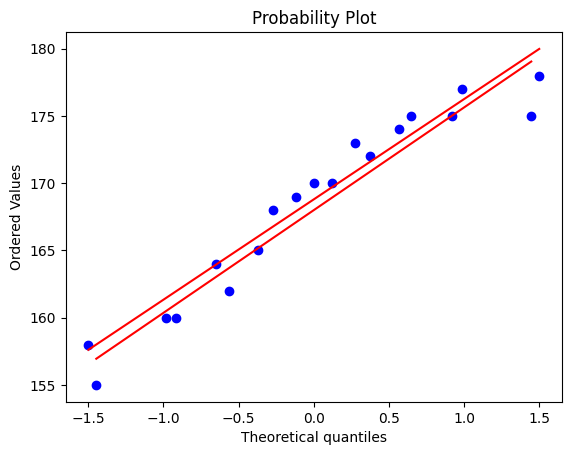

In [12]:
stats.probplot(m, dist = "norm", plot = pylab);
stats.probplot(d, dist = "norm", plot = pylab);

## Seminar_5

### Ниже приведены диаметры коронарных артерий после приема нифедипина и плацебо. Позволяют ли приводимые ниже данные утверждать, что нифедипин влияет на диаметр коронарных артерий?


$$t=\frac{\bar{x_1}-\bar{x_2}}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}; s^2 = \frac{\sum_{i=1}^n(x_i-\bar{x})^2}{n-1}; se=\frac{std}{\sqrt{n}}; std=\sqrt{D}$$

In [13]:
x = np.array([2.5, 2.2, 2.6, 2, 2.1, 1.8,2.4, 2.3, 2.7, 2.7, 1.9])
y = np.array([2.5, 1.7, 1.5, 2.5, 1.4, 1.9, 2.3, 2.0, 2.6, 2.3, 2.2])

def D_vibor(arr, mu):
    D = 0
    for i in arr:
        D += (mu - i) ** 2
    D /= (len(arr) - 1)
    return D ** 0.5

x_mean = np.mean(x)
y_mean = np.mean(y)
a = 0.05
std_x = D_vibor(x, x_mean)
std_y = D_vibor(y, y_mean)
D = (std_x ** 2 + std_y ** 2) / 2
t = (x_mean - y_mean) / (2 * D / len(x)) ** 0.5

print(f'{t:.4f}')

1.3283
